<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ReduceExcelRowsParticles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle Filtering Metrics Comparison

## Objective:
The objective of this code is to assess the performance of particle filtering applied to X and Y coordinates of particle locations across different time steps.
The comparison is based on various metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R2) Score, Euclidean Distance from the Mean, and Kolmogorov-Smirnov (KS) Statistic.

##Metrics Explanation:

###<u>Mean Squared Error (MSE):</u>

MSE provides a measure of the average of the squared differences between corresponding elements of the sampled and filtered data.
It quantifies the overall magnitude of errors. For each time step and pattern, MSE is calculated using the following formula:

**Formula:**

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (X_{\text{sampled}} - X_{\text{filtered}})^2 + (Y_{\text{sampled}} - Y_{\text{filtered}})^2 $

**Interpretation:** A lower MSE indicates a closer match between the original and filtered data.

**Numerical Example:**
Suppose for a given time step and pattern, we have:
- $X_{\text{sampled}} = [1, 2, 3]$
- $Y_{\text{sampled}} = [4, 5, 6]$
- $X_{\text{filtered}} = [2, 3, 4]$
- $Y_{\text{filtered}} = [5, 6, 7]$

Then, the MSE would be calculated as:
$ \text{MSE} = \frac{1}{3} [(1-2)^2 + (2-3)^2 + (3-4)^2 + (4-5)^2 + (5-6)^2 + (6-7)^2] = \frac{1}{3} [1 + 1 + 1 + 1 + 1 + 1] = 2 $

**Interpretation Example:**
In this example, the MSE is 2, indicating that, on average, the squared differences between the sampled and filtered data points are 2.

###<u>Mean Absolute Error (MAE):</u>

MAE measures the average of the absolute differences between corresponding elements of the sampled and filtered data.
It provides a robust measure of the magnitude of errors. MAE is calculated for each time step and pattern using the following formula:

**Formula:**

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |X_{\text{sampled}} - X_{\text{filtered}}| + |Y_{\text{sampled}} - Y_{\text{filtered}}| $

**Interpretation:** A lower MAE signifies a better match between the original and filtered data.

**Numerical Example:**
Using the same values as in the MSE example, the MAE would be calculated as:
$ \text{MAE} = \frac{1}{3} [|1-2| + |2-3| + |3-4| + |4-5| + |5-6| + |6-7|] = \frac{1}{3} [1 + 1 + 1 + 1 + 1 + 1] = 2 $

**Interpretation Example:**
In this example, the MAE is 2, indicating that, on average, the absolute differences between the sampled and filtered data points are 2.

###<u>R-squared (R2) Score:</u>

R2 measures the proportion of the variance in the dependent variable (original data) that is predictable from the independent variable (filtered data).
It ranges from 0 to 1, with higher values indicating a better fit. R2 is calculated using the formula:

**Formula:**

$ \text{R2} = 1 - \frac{\sum_{i=1}^{n} (y_{\text{sampled}} - y_{\text{filtered}})^2}{\sum_{i=1}^{n} (y_{\text{sampled}} - \bar{y}_{\text{sampled}})^2} $

**Interpretation:** A higher R2 score suggests a stronger correlation between the original and filtered data.

**Numerical Example:**
If, for a given time step, we have:
- $y_{\text{sampled}} = [10, 12, 15]$
- $y_{\text{filtered}} = [11, 13, 14]$
- $\bar{y}_{\text{sampled}} = \frac{10 + 12 + 15}{3} = 12.33$

Then, the R2 would be calculated as:
$ \text{R2} = 1 - \frac{(10-11)^2 + (12-13)^2 + (15-14)^2}{(10-12.33)^2 + (12-12.33)^2 + (15-12.33)^2} = 0.71 $

**Interpretation Example:**
In this example, the R2 is 0.71, indicating that 71% of the variance in the original data is predictable from the filtered data.

###<u>Euclidean Distance from the Mean:</u>

This metric calculates the Euclidean distance between each point in the original and filtered data to their respective means.
It provides a measure of how much the points deviate from the mean.

**Formula:**

$ \text{Distance from Mean} = \sqrt{(X - \bar{X})^2 + (Y - \bar{Y})^2} $

**Numerical Example:**
If, for a given time step, we have:
- $X = [1, 2, 3]$
- $Y = [4, 5, 6]$
- $\bar{X} = \frac{1 + 2 + 3}{3} = 2$
- $\bar{Y} = \frac{4 + 5 + 6}{3} = 5$

Then, the distance from the mean would be calculated as:
$ \text{Distance from Mean} = \sqrt{ (1-2)^2 + (4-5)^2 } = \sqrt{2} $

**Interpretation Example:**
In this example, the distance from the mean is approximately 1.41, indicating that, on average, the points deviate by 1.41 units from the mean.

###<u>Kolmogorov-Smirnov (KS) Statistic:</u>

The KS statistic measures the maximum vertical distance between the cumulative distribution functions of the sampled and filtered data.

**Formula:**

$ \text{KS Statistic} = \max |F_{\text{sampled}}(x) - F_{\text{filtered}}(x)| $

**Interpretation:** A lower KS statistic suggests a better agreement between the cumulative distributions.

**Numerical Example:**
If, for a given time step, we have two sets of sampled and filtered data:
- $F_{\text{sampled}}(x) = [0.1, 0.4, 0.8]$
- $F_{\text{filtered}}(x) = [0.2, 0.5, 0.7]$

Then, the KS would be calculated as:
$ \text{KS Statistic} = \max |0.1 - 0.2|, |0.4 - 0.5|, |0.8 - 0.7| = 0.2 $

**Interpretation Example:**
In this example, the KS Statistic is 0.2, indicating a relatively small maximum vertical distance between the cumulative distributions.

###<u>Kolm ogorov-Smirnov (KS) P-Value:</u>

The KS P-Value assesses how well the filtered data distribution matches the sampled data distribution. A high P-Value indicates a good match.

**Interpretation Example:**
A high KS P-Value would suggest that there is no significant difference between the distributions of the sampled and filtered data.

# Particle Filtering and Metrics Analysis

This code reads particle location data from an Excel file, filters the data based on specified patterns, and calculates various metrics to evaluate the performance of the filtering process. The main steps include:

## Data Loading
- Particle location data is loaded from an Excel file, where each sheet represents the X and Y coordinates of particles at different time steps.

## Filtering Process
- Particle data is filtered based on specified patterns. The filtering involves selecting specific rows from the data based on a given pattern.

## Metrics Calculation
- The code calculates the following metrics for each time step and filtering pattern:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - R-squared (R2) Score
  - Distance from Mean
  - Kolmogorov-Smirnov (KS) Statistic and P-Value for both X and Y coordinates

## Plotting
- The results are visualized in two separate charts:
  1. Particle locations (MSE, MAE, R2, Distance)
  2. KS Statistic and P-Value for X and Y coordinates

## Saving Outputs
- The filtered particle data and metrics are saved to an Excel file. Additionally, the generated plots are saved as high-quality JPG images.

## Usage
- Simply run the code in a Jupyter notebook or Google Colab environment. Adjustments can be made to parameters such as patterns, time steps, and file paths as needed.

Enjoy exploring and analyzing particle filtering performance!


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_5000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows
def filter_rows(df):
    return df[df.index % 5 == 1]

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, df in filtered_data.items():
        df.to_excel(writer, sheet_name=sheet, index=False)

output_file_path

# Particle Data Filtering

This code performs data filtering on particle location information from an Excel file. The code executes the following tasks:

1. **Load Data:**
   - Load the X and Y coordinate data from an Excel file containing particle locations with multiple sheets.

2. **Filtering Function:**
   - Define a function to filter rows based on a specified pattern for a given DataFrame. The function extracts every ith row from the DataFrame based on the specified patterns.

3. **Patterns:**
   - Specify a set of patterns (e.g., 10) for filtering the data. (Note: Other patterns are commented out but can be used as needed.)

4. **Apply Filtering:**
   - Apply the filtering function to each sheet in the Excel file, creating a dictionary of DataFrames for each pattern.

5. **Save Filtered Data:**
   - Save the filtered data back to an Excel file with new sheets, where each sheet corresponds to a different pattern.
   - The sheet names are structured as '{original_sheet_name}_{pattern}'.

6. **Output Path:**
   - The filtered Excel file is saved with the name "particleLocations_filtered.xlsx" in the "/content/" directory.

Note: The code is designed to be flexible, allowing for different filtering patterns. Currently, it is set to filter with a pattern of 10, but this can be modified by uncommenting the relevant section of the code.

In [87]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_5000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df):
    patterns = [10]#[2, 3, 4, 5, 6, 8, 10, 12, 15, 20]
    filtered_data = {f'Pattern_{pattern}': df[df.index % pattern == 1] for pattern in patterns}
    return filtered_data

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel with new sheets
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, patterns in filtered_data.items():
        for pattern, df in patterns.items():
            df.to_excel(writer, sheet_name=f'{sheet}_{pattern}', index=False)

output_file_path

'/content/particleLocations_filtered.xlsx'

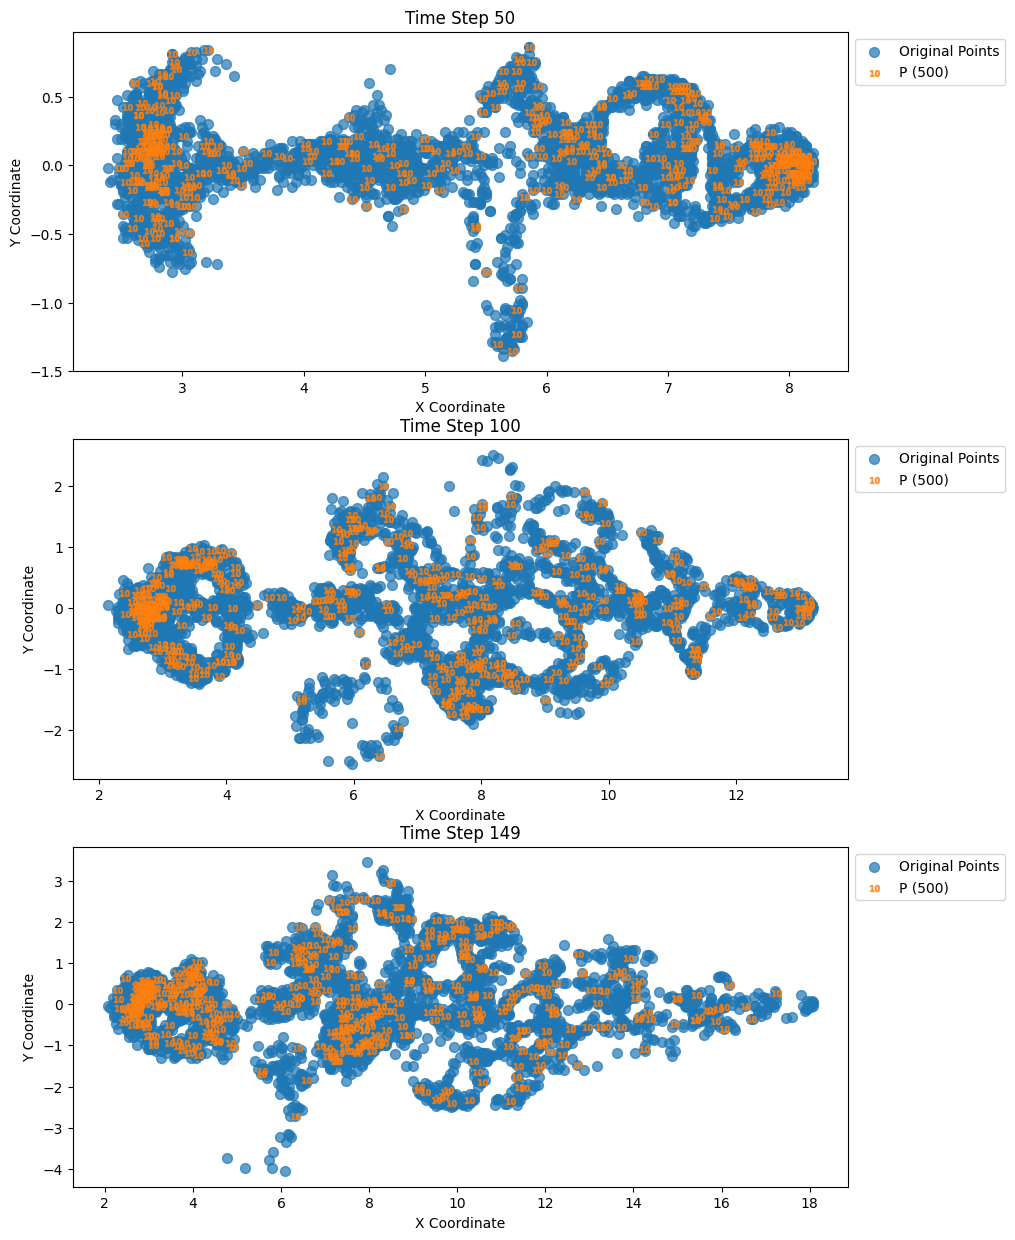

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_5000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [10]#[2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

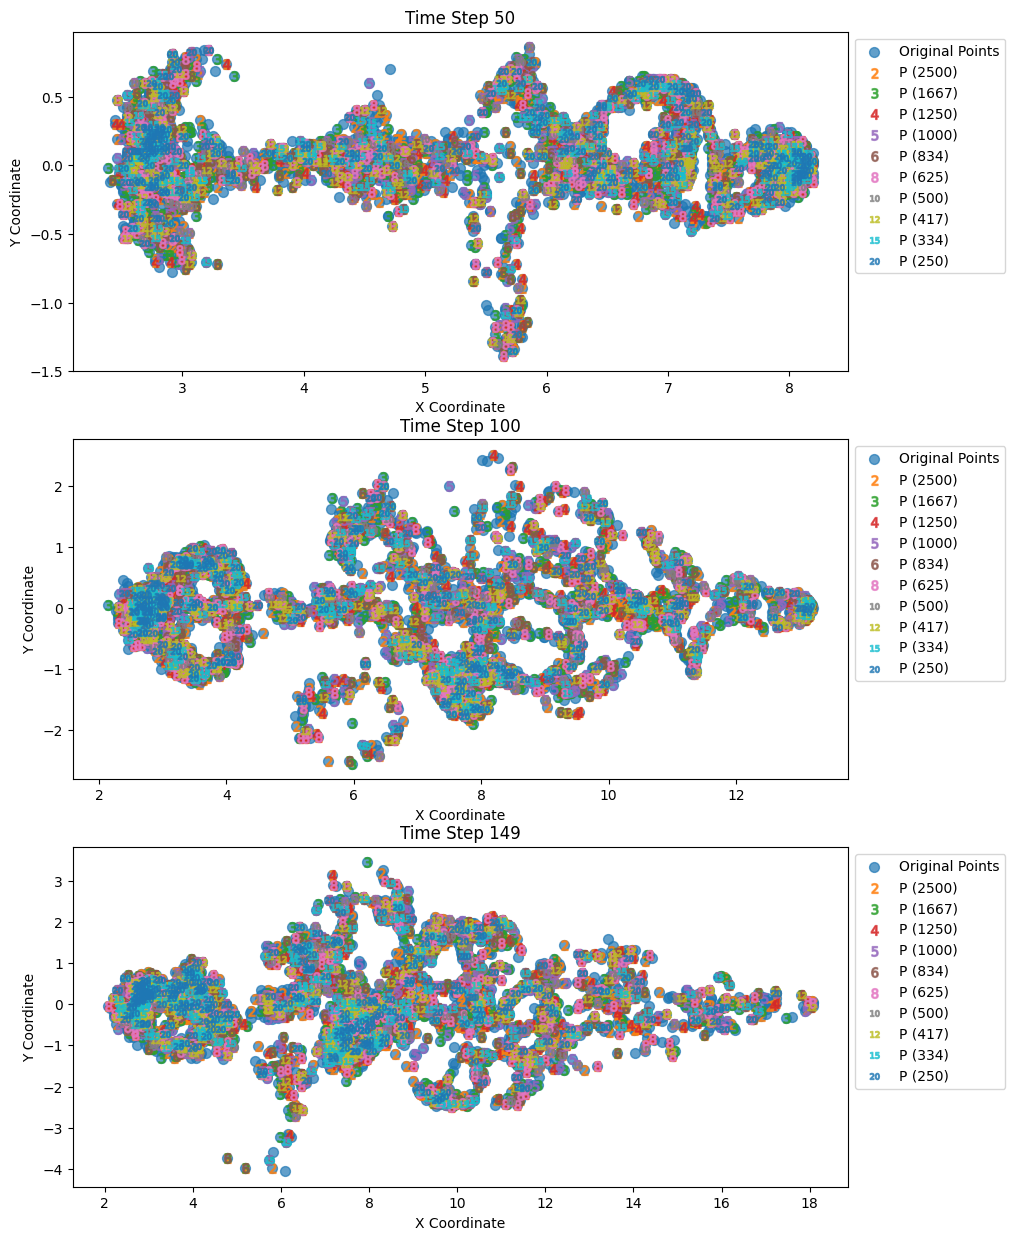

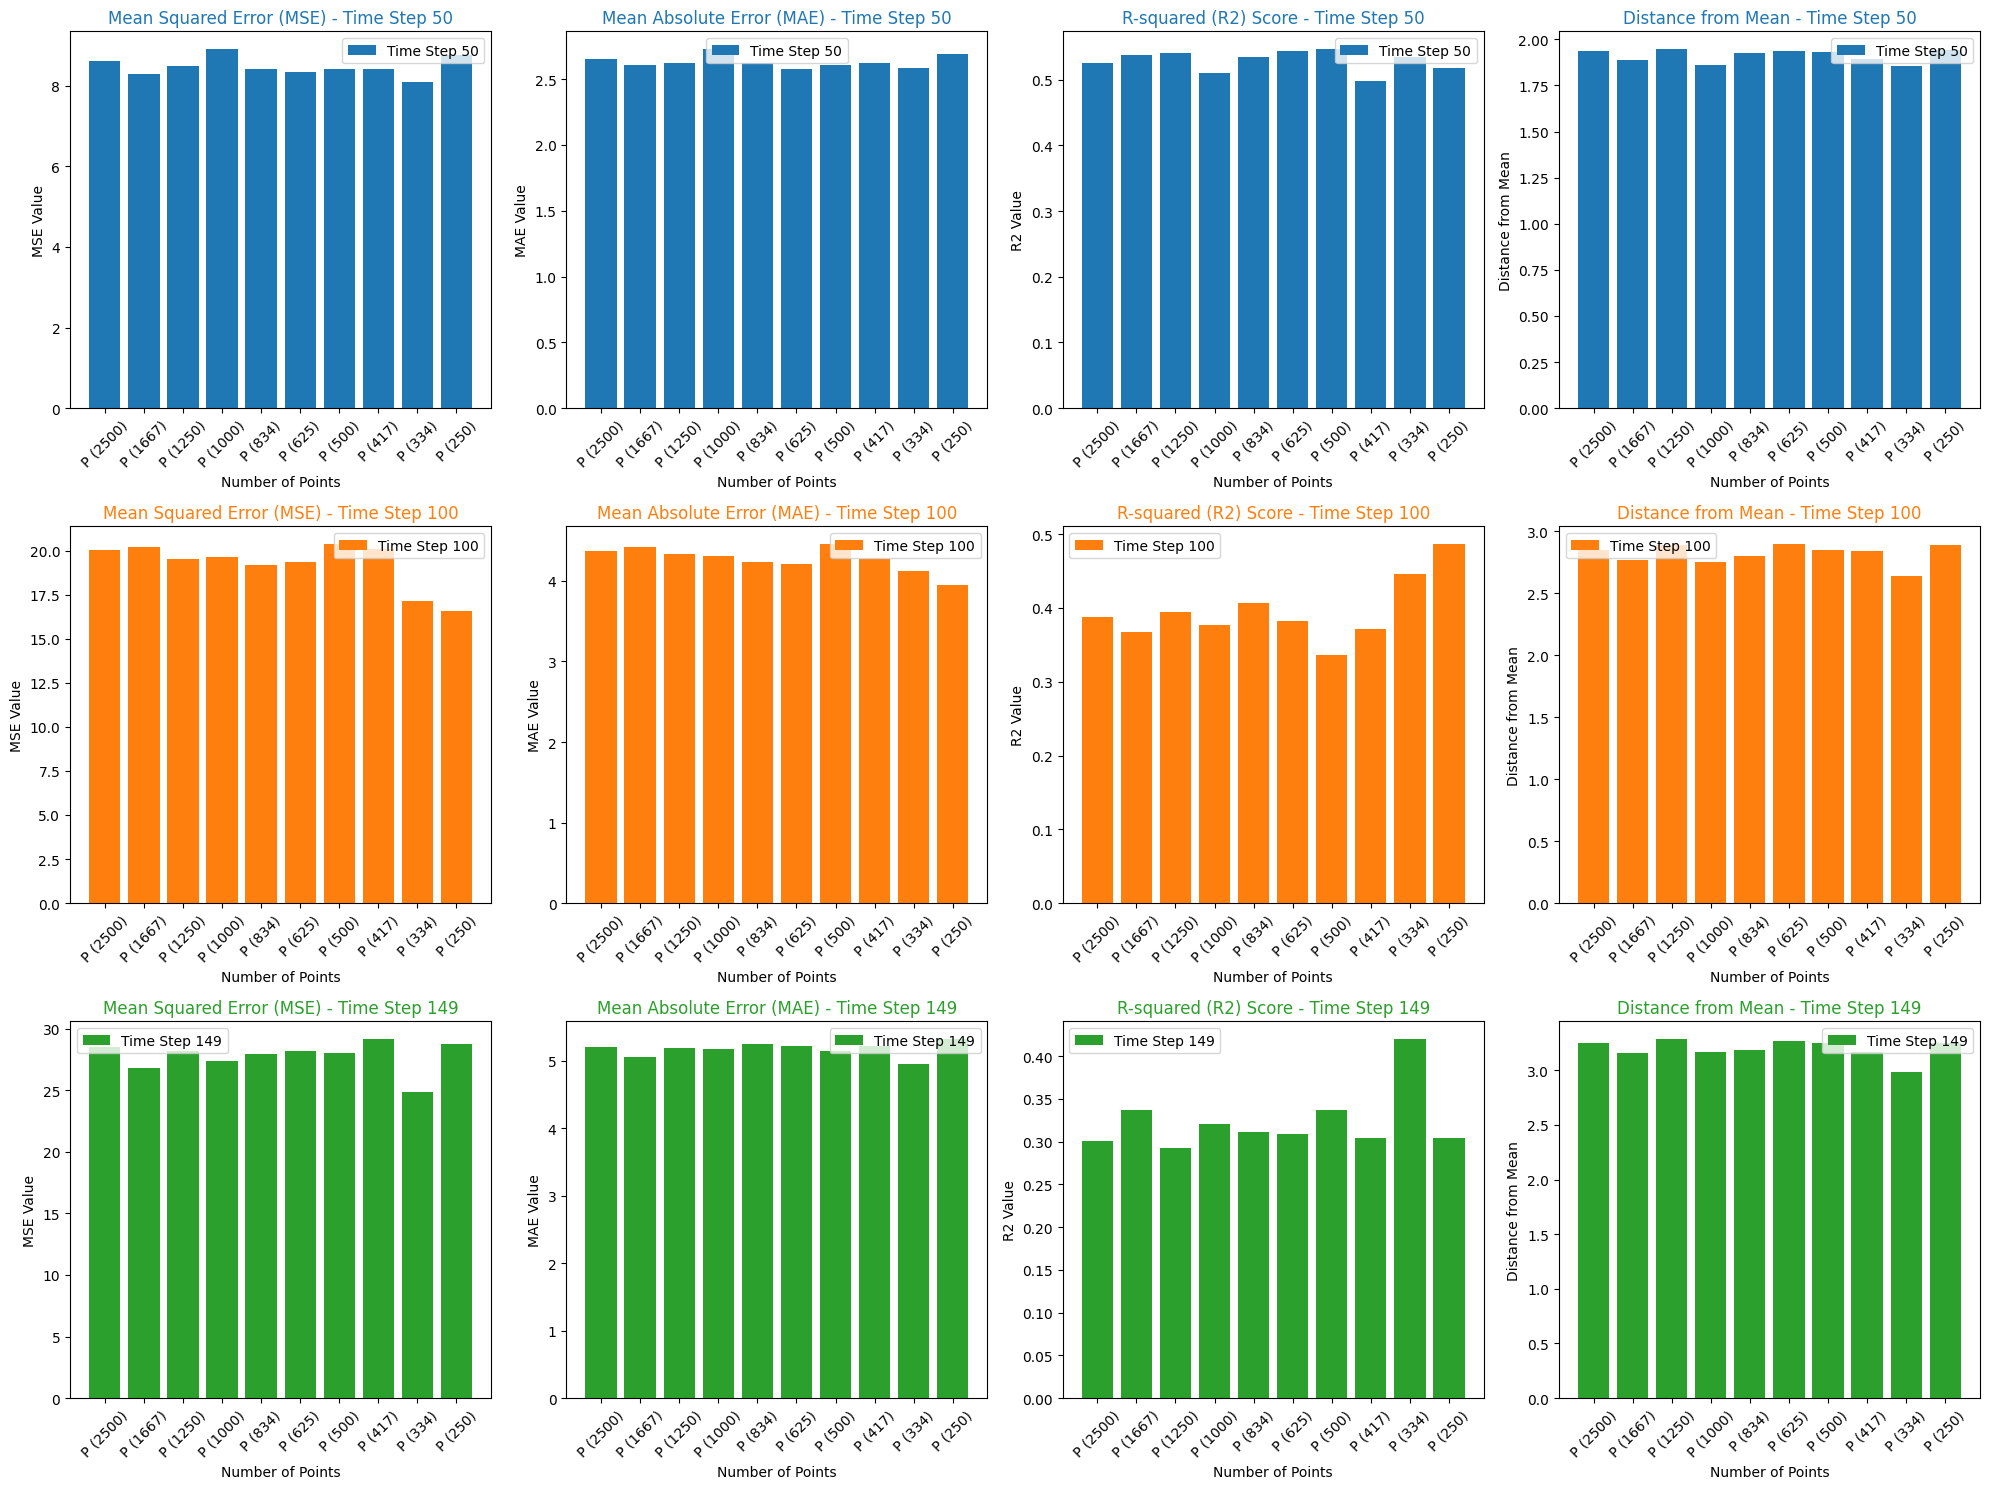

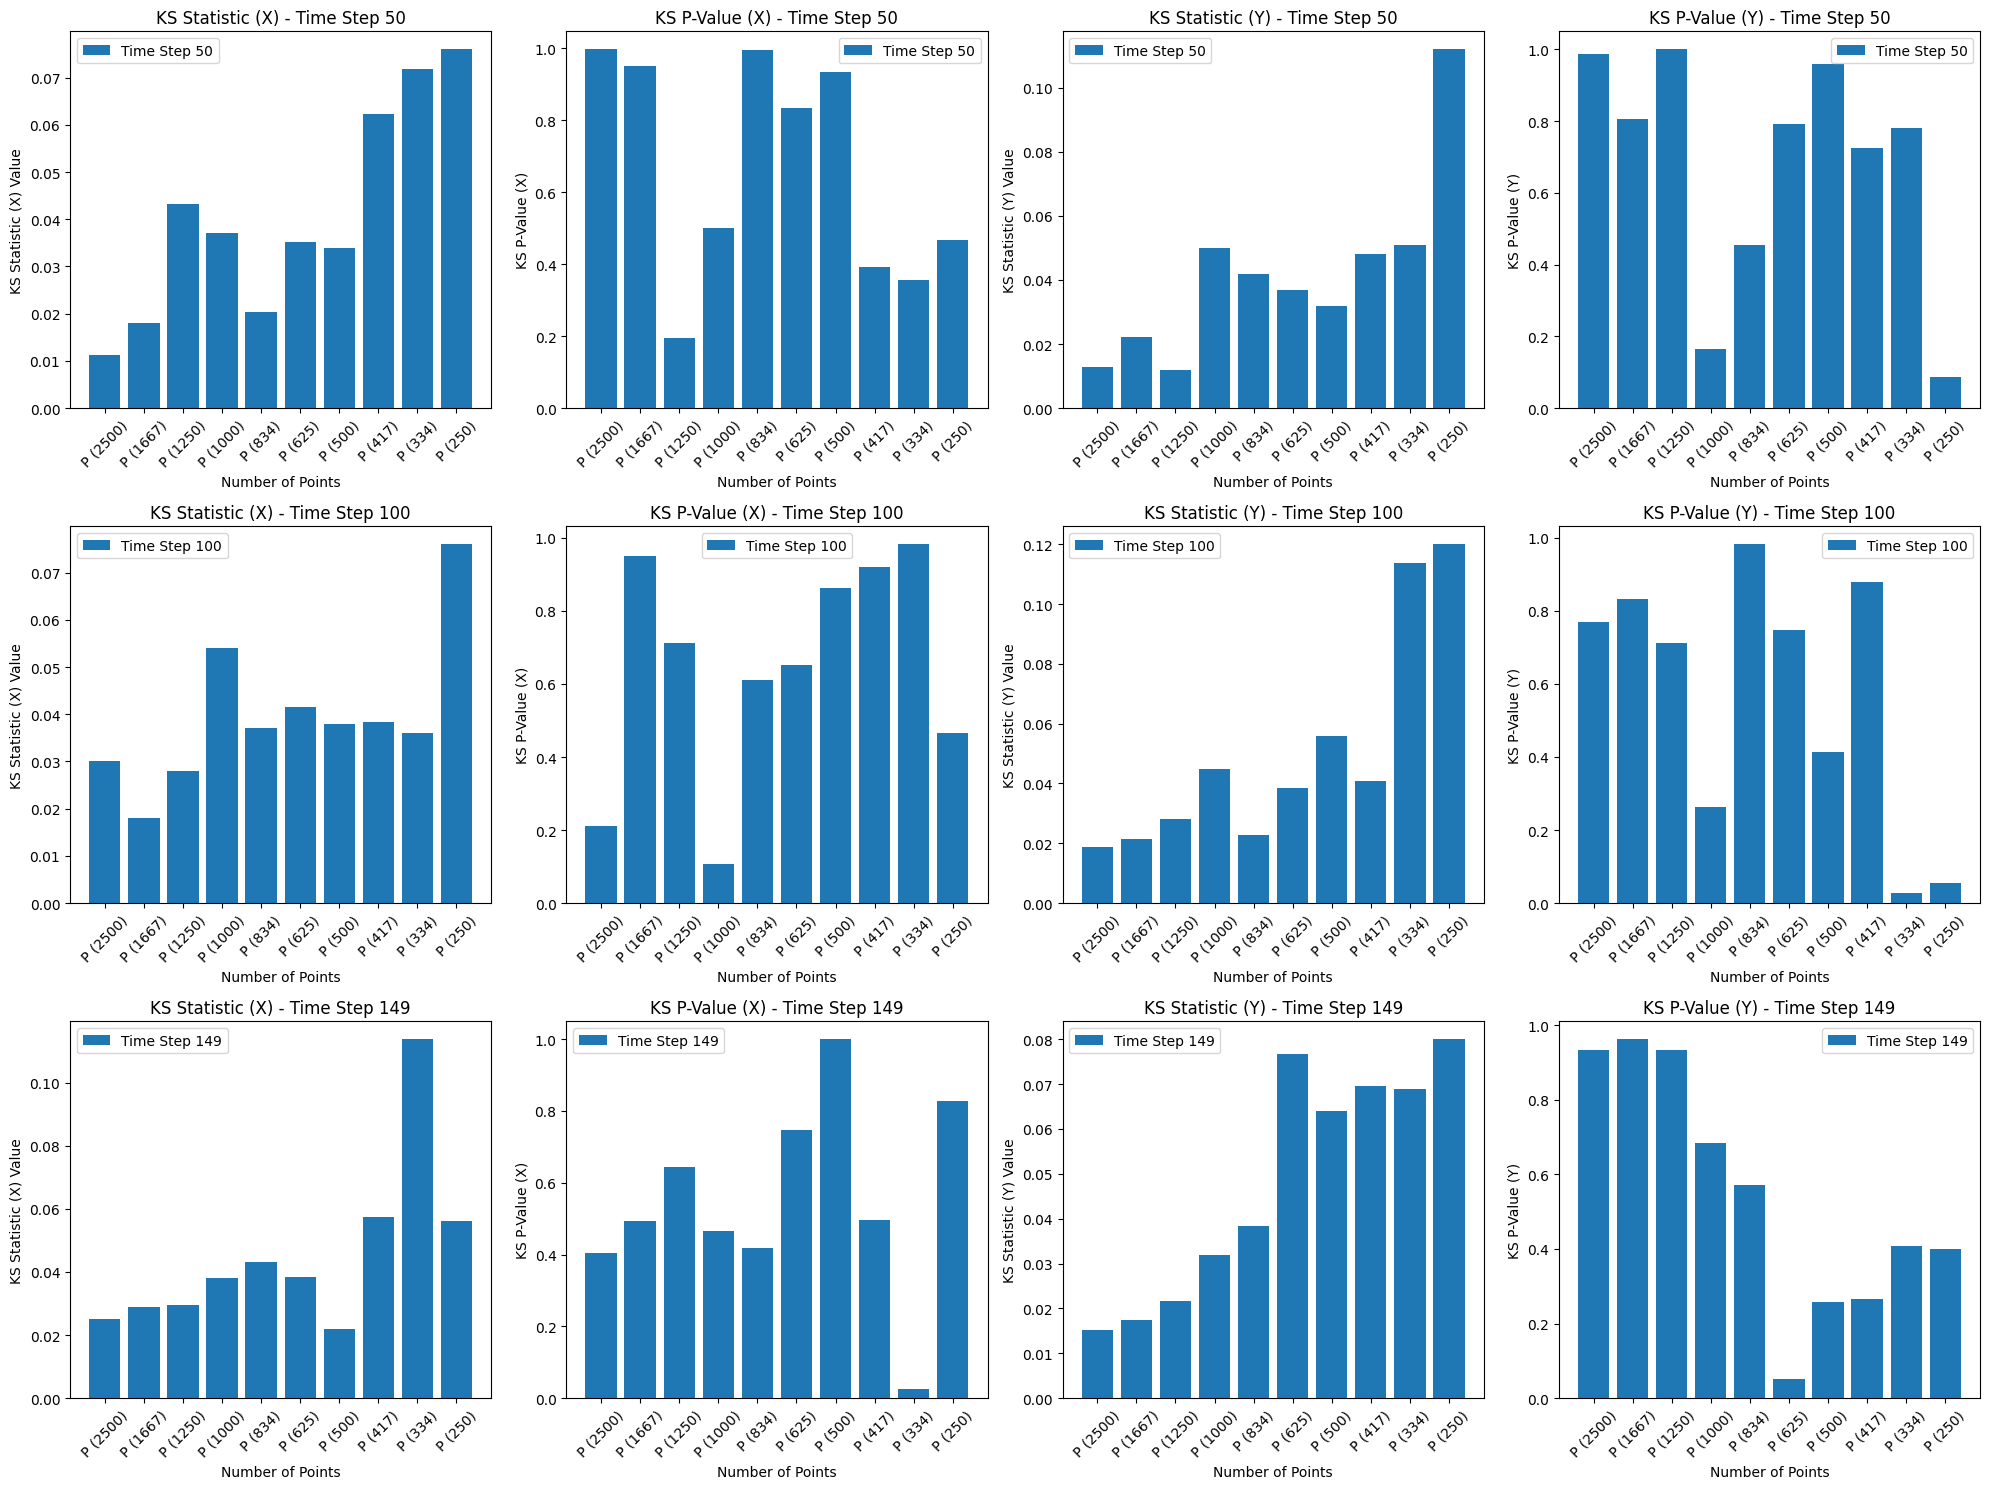

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_5000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store metrics values for each pattern and time step
metrics_values = {
    'mse': [],
    'mae': [],
    'r2': [],
    'distance_from_mean': [],
    'ks_statistic_x': [],
    'ks_p_value_x': [],
    'ks_statistic_y': [],
    'ks_p_value_y': []
}

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []
distance_from_mean_labels = []
ks_labels_x = []
ks_labels_y = []

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []
    distance_from_mean_labels_time_step = []
    ks_labels_x_time_step = []
    ks_labels_y_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        distance_from_mean = calculate_distance_from_mean(original_points, filtered_points[f'Pattern_{pattern}'])
        ks_statistic_x, ks_p_value_x = ks_2samp(sampled_x_data[f'Column{time_step}'], filtered_x_data[f'Column{time_step}'])
        ks_statistic_y, ks_p_value_y = ks_2samp(sampled_y_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}'])

        # Append values to lists
        metrics_values['mse'].append(mse)
        metrics_values['mae'].append(mae)
        metrics_values['r2'].append(r2)
        metrics_values['distance_from_mean'].append(distance_from_mean)
        metrics_values['ks_statistic_x'].append(ks_statistic_x)
        metrics_values['ks_p_value_x'].append(ks_p_value_x)
        metrics_values['ks_statistic_y'].append(ks_statistic_y)
        metrics_values['ks_p_value_y'].append(ks_p_value_y)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')
        distance_from_mean_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_x_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_y_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)
    distance_from_mean_labels.append(distance_from_mean_labels_time_step)
    ks_labels_x.append(ks_labels_x_time_step)
    ks_labels_y.append(ks_labels_y_time_step)

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics_random_sampling.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=4, figsize=(20, 15))

# Add subplots for displaying MSE, MAE, R2, Distance for each time step
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying MSE values
    axes_metrics[i, 0].bar(range(len(patterns)), metrics_values['mse'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mse_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 0].set_title(f'Mean Squared Error (MSE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 0].set_ylabel('MSE Value')  # Updated ylabel
    axes_metrics[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 0].legend()

    # Add a subplot for displaying MAE values
    axes_metrics[i, 1].bar(range(len(patterns)), metrics_values['mae'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mae_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 1].set_title(f'Mean Absolute Error (MAE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 1].set_ylabel('MAE Value')  # Updated ylabel
    axes_metrics[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 1].legend()

    # Add a subplot for displaying R2 values
    axes_metrics[i, 2].bar(range(len(patterns)), metrics_values['r2'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=r2_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 2].set_title(f'R-squared (R2) Score - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 2].set_ylabel('R2 Value')  # Updated ylabel
    axes_metrics[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 2].legend()

    # Add a subplot for displaying Distance from Mean values
    axes_metrics[i, 3].bar(range(len(patterns)), metrics_values['distance_from_mean'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=distance_from_mean_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 3].set_title(f'Distance from Mean - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 3].set_ylabel('Distance from Mean')  # Updated ylabel
    axes_metrics[i, 3].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 3].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 3].legend()

# Adjust layout
plt.tight_layout()

# Save the figure as a high-quality JPG
fig_metrics.savefig('/content/metrics_plot.jpg', dpi=300)

# Create subplots for displaying KS Statistic (X), KS P-Value (X), KS Statistic (Y), and KS P-Value (Y) for each time step
fig_ks, axes_ks = plt.subplots(nrows=len(time_steps_to_plot), ncols=4, figsize=(20, 15))

for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying KS Statistic (X) values
    axes_ks[i, 0].bar(range(len(patterns)), metrics_values['ks_statistic_x'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_x[i],
                            label=f'Time Step {time_step}')

    axes_ks[i, 0].set_title(f'KS Statistic (X) - Time Step {time_step}')
    axes_ks[i, 0].set_ylabel('KS Statistic (X) Value')
    axes_ks[i, 0].set_xlabel('Number of Points')
    axes_ks[i, 0].tick_params(axis='x', rotation=45)
    axes_ks[i, 0].legend()

    # Add a subplot for displaying KS P-Value (X) values
    axes_ks[i, 1].bar(range(len(patterns)), metrics_values['ks_p_value_x'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_x[i],
                            label=f'Time Step {time_step}')

    axes_ks[i, 1].set_title(f'KS P-Value (X) - Time Step {time_step}')
    axes_ks[i, 1].set_ylabel('KS P-Value (X)')
    axes_ks[i, 1].set_xlabel('Number of Points')
    axes_ks[i, 1].tick_params(axis='x', rotation=45)
    axes_ks[i, 1].legend()

    # Add a subplot for displaying KS Statistic (Y) values
    axes_ks[i, 2].bar(range(len(patterns)), metrics_values['ks_statistic_y'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_y[i],
                            label=f'Time Step {time_step}')

    axes_ks[i, 2].set_title(f'KS Statistic (Y) - Time Step {time_step}')
    axes_ks[i, 2].set_ylabel('KS Statistic (Y) Value')
    axes_ks[i, 2].set_xlabel('Number of Points')
    axes_ks[i, 2].tick_params(axis='x', rotation=45)
    axes_ks[i, 2].legend()

    # Add a subplot for displaying KS P-Value (Y) values
    axes_ks[i, 3].bar(range(len(patterns)), metrics_values['ks_p_value_y'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_y[i],
                            label=f'Time Step {time_step}')

    axes_ks[i, 3].set_title(f'KS P-Value (Y) - Time Step {time_step}')
    axes_ks[i, 3].set_ylabel('KS P-Value (Y)')
    axes_ks[i, 3].set_xlabel('Number of Points')
    axes_ks[i, 3].tick_params(axis='x', rotation=45)
    axes_ks[i, 3].legend()

# Adjust layout
plt.tight_layout()

# Save the figure as a high-quality JPG
fig_ks.savefig('/content/ks_plot.jpg', dpi=300)

# Show the plots
plt.show()


# Distance from Mean Comparison

This code calculates and visualizes the distance from the mean point for a set of particles at different time steps, considering various patterns of data filtering. The code performs the following steps:

1. **Load Data:**
   - Load the X and Y coordinate data from an Excel file containing particle locations.

2. **Filtering Function:**
   - Define a function to filter rows based on a specified pattern. This function extracts every ith row from the dataset.

3. **Distance Calculation Function:**
   - Define a function to calculate the distance from the mean point for a given dataset. The distance is calculated as the average Euclidean distance from each point to the mean point.

4. **Patterns:**
   - Specify a set of patterns (e.g., 2, 3, 4, ...) to filter the data.

5. **Time Steps:**
   - Select specific time steps to analyze.

6. **Create Table:**
   - For each selected time step, calculate the distance from the mean for the original dataset and filtered datasets using different patterns.
   - Store the results in a table with columns representing the time step, distance from mean for the original data, and distances for each filtered dataset (labeled by the number of points after filtering).

7. **Print Table:**
   - Print the results table using the tabulate library, displaying the distances with three decimal places.

8. **Bar Chart Visualization:**
   - For each selected time step, create a bar chart to visualize the distances from the mean for the original and filtered datasets.
   - The x-axis labels represent the number of points after filtering (e.g., P(2000), P(1500), ...) for each pattern.
   - Different colors are used for bars corresponding to different patterns.

9. **Save Results:**
   - Save the results table to an Excel file named "distance_table.xlsx."
   - Save each bar chart as a high-quality JPG file with the time step in the filename.

Note: The code uses the `tabulate` library to format the table and incorporates color-coded bars to represent different patterns in the bar charts.

+---+-----------+----------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+
|   | Time Step | Original | P(2500) | P(1667) | P(1250) | P(1000) | P(834) | P(625) | P(500) | P(417) | P(334) | P(250) |
+---+-----------+----------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+
| 0 |   50.0    |  1.896   |  1.938  |  1.891  |  1.944  |  1.855  | 1.927  | 1.933  | 1.931  | 1.896  | 1.848  | 1.946  |
| 1 |   100.0   |  2.802   |  2.848  |  2.772  |  2.887  |  2.755  | 2.798  | 2.896  | 2.849  | 2.841  | 2.642  | 2.887  |
| 2 |   149.0   |  3.218   |  3.251  |  3.157  |  3.285  |  3.171  | 3.175  | 3.269  | 3.256  | 3.164  | 2.979  | 3.245  |
+---+-----------+----------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+


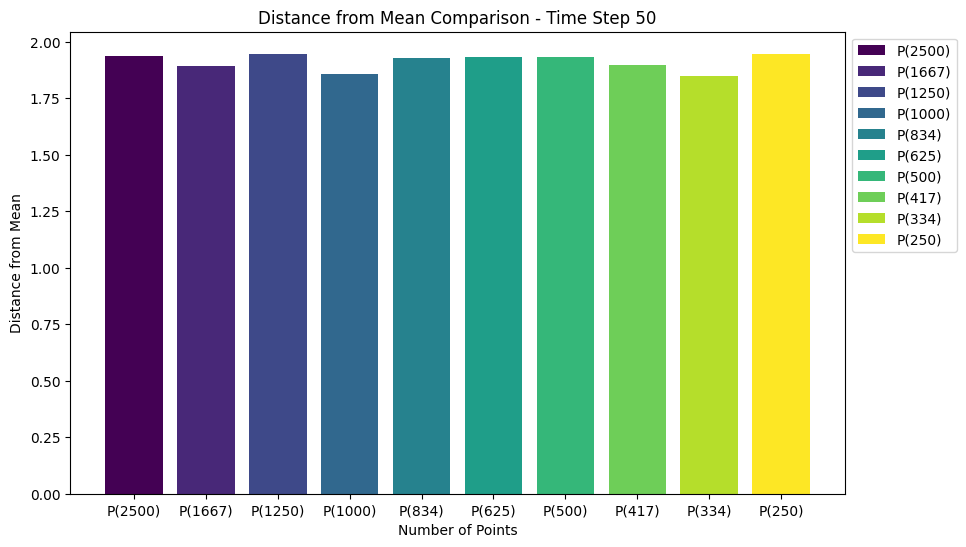

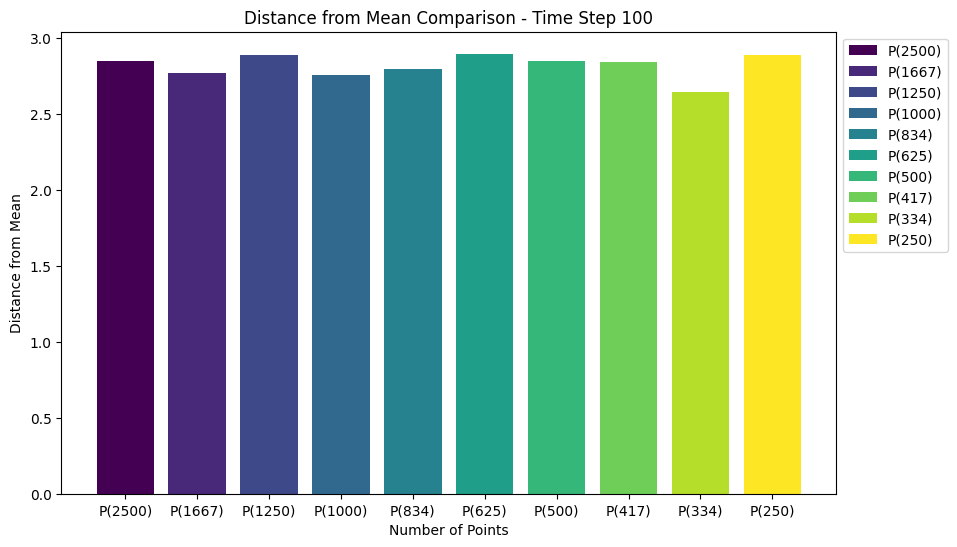

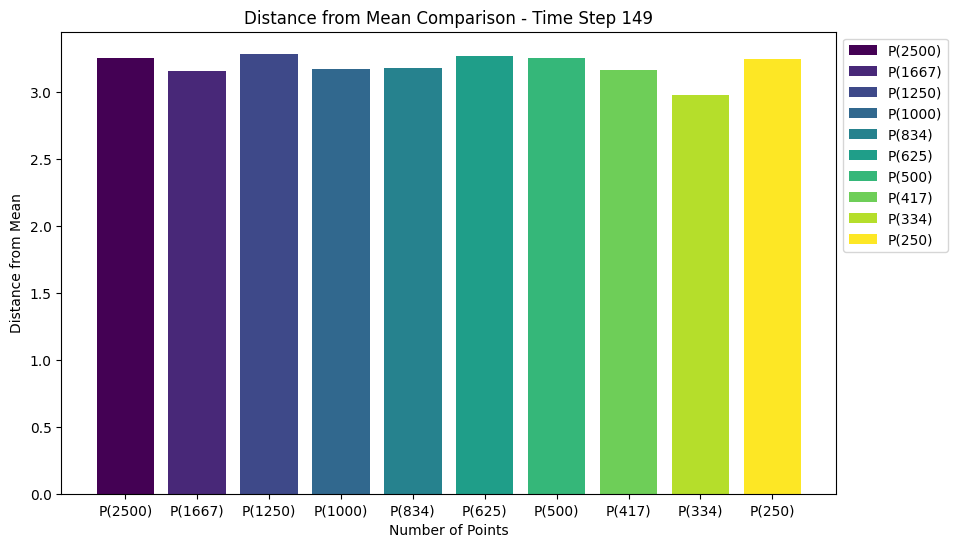

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Load the Excel file
file_path = '/content/particleLocations_5000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Function to calculate distance from mean point
def calculate_distance_from_mean(df):
    mean_point = df.mean()
    distances = np.sqrt((df['X'] - mean_point['X'])**2 + (df['Y'] - mean_point['Y'])**2)
    return distances.mean() if not distances.empty else np.nan

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create a table to store distance values for each pattern and time step
table_data = []

for time_step in time_steps_to_plot:
    # Original data
    original_x_data = x_data[f'Column{time_step}']
    original_y_data = y_data[f'Column{time_step}']
    original_data = pd.DataFrame({'X': original_x_data, 'Y': original_y_data})

    # Calculate distance from mean for original data
    original_distance = round(calculate_distance_from_mean(original_data), 3)

    # Filtered data for each pattern
    row_data = {'Time Step': time_step, 'Original': original_distance}
    for pattern in patterns:
        filtered_x_data = filter_rows(x_data, pattern)[f'Column{time_step}']
        filtered_y_data = filter_rows(y_data, pattern)[f'Column{time_step}']
        filtered_data = pd.DataFrame({'X': filtered_x_data, 'Y': filtered_y_data})

        # Calculate distance from mean for filtered data
        row_data[f'P({len(filtered_data)})'] = round(calculate_distance_from_mean(filtered_data), 3)

    table_data.append(row_data)

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data)

# Print the table using tabulate
print(tabulate(table_df, headers='keys', tablefmt='pretty', floatfmt='.3f'))

# Plot separate bar charts for each time step
for i, time_step in enumerate(time_steps_to_plot):
    plt.figure(figsize=(10, 6))

    # Define colors for bars
    colors = plt.cm.viridis(np.linspace(0, 1, len(patterns)))

    # Plot bars for each pattern
    for j, pattern in enumerate(patterns):
        num_points = len(filter_rows(x_data, pattern)[f'Column{time_step}'])
        plt.bar(f'P({num_points})', table_df.loc[i, f'P({num_points})'],
                label=f'P({num_points})', color=colors[j])

    plt.xlabel('Number of Points')
    plt.ylabel('Distance from Mean')
    plt.title(f'Distance from Mean Comparison - Time Step {time_step}')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    plt.show()